## Dimensionality Reduction Project for Unsupervised Learning Certification by IBM

In [1]:
#normal imports and load our csv file into a dataframe
import numpy as np
import pandas as pd

mushrooms_df = pd.read_csv('agaricus-lepiota.csv')
mushrooms_df

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8119,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8120,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8121,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [2]:
#check the dataframe for missing values
mushrooms_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8123 entries, 0 to 8122
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   p       8123 non-null   object
 1   x       8123 non-null   object
 2   s       8123 non-null   object
 3   n       8123 non-null   object
 4   t       8123 non-null   object
 5   p.1     8123 non-null   object
 6   f       8123 non-null   object
 7   c       8123 non-null   object
 8   n.1     8123 non-null   object
 9   k       8123 non-null   object
 10  e       8123 non-null   object
 11  e.1     8123 non-null   object
 12  s.1     8123 non-null   object
 13  s.2     8123 non-null   object
 14  w       8123 non-null   object
 15  w.1     8123 non-null   object
 16  p.2     8123 non-null   object
 17  w.2     8123 non-null   object
 18  o       8123 non-null   object
 19  p.3     8123 non-null   object
 20  k.1     8123 non-null   object
 21  s.3     8123 non-null   object
 22  u       8123 non-null   

In [3]:
#split our original dataframe into a features set and a target set. Our target is column p and all other columns are my features.
features_df = mushrooms_df.drop('p', axis=1)
target_df = mushrooms_df['p']

In [4]:
#check our target df
target_df.head()

0    e
1    e
2    p
3    e
4    e
Name: p, dtype: object

In [5]:
#check our features df
features_df.head()

,x,s,n,t,p.1,f,c,n.1,k,e,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
1,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
2,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
3,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
4,x,y,y,t,a,f,c,b,n,e,...,s,w,w,p,w,o,p,k,n,g


In [6]:
#import for creating our training and test sets. Then create our training and test sets with 80% training size.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_df, target_df, train_size=0.8)

In [7]:
#load our imports for onehotencodeing and labelencoding
#In this cell we will labelencode our feature column
#we do this by creating our label encoder object, then calling on the object to fit and transform the data

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

label_encoder = LabelEncoder()

#y_train_label_encoded = y_train
y_train_label_encoded = label_encoder.fit_transform(y_train)


#y_test_label_encoded = y_test
y_test_label_encoded = label_encoder.fit_transform(y_test)

In [55]:
#Print some values to ensure our label encoder did in fact label encode

print(y_train_label_encoded[0:9])
print(y_test_label_encoded[0:9])

[0 0 0 1 1 0 0 0 1]
[0 1 1 0 1 1 0 1 1]


In [9]:
#We will do the one hot encoding in this cell
#I will set drop to 'first' for best practice and sparse = False to get my dense array
#After creating the object for the onehotencoder, use it and call fit_transform on the training data and just transform on the test data
#I do this because I want the test data to be encoded in the same way as the test data. Calling fit.transform on the test data gave me
# 92 columns instead of 94 like the test data. Using transform created the necessary 94 columns. 
one_hot_encoder = OneHotEncoder(sparse_output = False, drop = 'first')

#X_train_hot_encoded = X_train
X_train_hot_encoded = one_hot_encoder.fit_transform(X_train)

#X_test_hot_encoded = X_test
X_test_hot_encoded = one_hot_encoder.transform(X_test)

In [60]:
#Get the dimensions of our array so we know the input plug in for our tensorflow neural network

X_train_hot_encoded.shape

(6498, 94)

In [10]:
#create our neural network for binary classifiers. 
# I instantiate my model with the Sequential class
# I create my first layer, making sure my input_dim is equal to my new number of features after one hot encoding
# I use the standard output layer with 1 neuron and activation sigmoid
# I use the standard compile parameters for creating a binary classifier. 
# I use the .summary() to check my network.
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(128, activation='relu', input_dim=94))

model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

C:\Users\mmice\tensorflow_env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │          12,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,289 (48.00 KB)

 Trainable params: 12,289 (48.00 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
hist = model.fit(X_train_hot_encoded, y_train_label_encoded, validation_data=(X_test_hot_encoded, y_test_label_encoded), epochs=10, batch_size=100)

# In order to fit my model, I use all of the encoded data, run with 10 epochs, and decide on a batch size of 100.

Epoch 1/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7874 - loss: 0.4797 - val_accuracy: 0.9692 - val_loss: 0.1237
Epoch 2/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9780 - loss: 0.0859 - val_accuracy: 0.9957 - val_loss: 0.0412
Epoch 3/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9957 - loss: 0.0317 - val_accuracy: 0.9988 - val_loss: 0.0206
Epoch 4/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9988 - loss: 0.0166 - val_accuracy: 0.9994 - val_loss: 0.0123
Epoch 5/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9993 - loss: 0.0101 - val_accuracy: 0.9994 - val_loss: 0.0081
Epoch 6/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9999 - loss: 0.0065 - val_accuracy: 0.9994 - val_loss: 0.0057
Epoch 7/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9999 - loss: 0.0047 - val_accuracy: 0.9994 - val_loss: 0.0044
Epoch 8/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9998 - loss: 0.0038 - val_accuracy: 1.0000 - val_loss:

[]

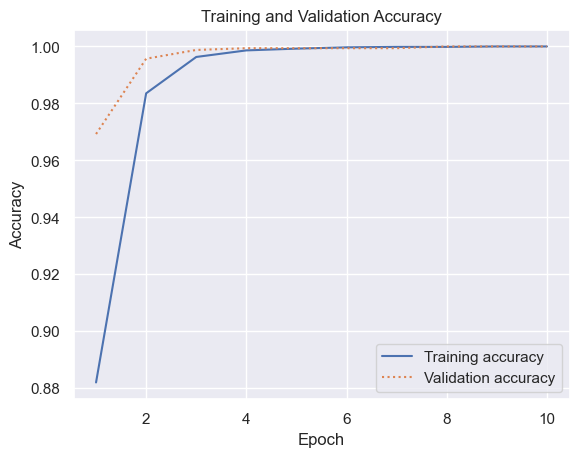

In [12]:
#plotting our training accuracy versus our validation accuracy

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

In [13]:
#creating our predictions for our confusion matrix and scores

from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, ConfusionMatrixDisplay


sns.reset_orig()
y_predicted = model.predict(X_test_hot_encoded) > 0.5

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [14]:
#use our predicted scores versus our y_test encoded data to calculate our scores
# use our predictions versus our y_test encoded data to create our confusion matrix

accuracy = accuracy_score(y_test_label_encoded, y_predicted)
recall = recall_score(y_test_label_encoded, y_predicted)
f1 = f1_score(y_test_label_encoded, y_predicted)
precision = precision_score(y_test_label_encoded, y_predicted)

print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")


labels = ['Negative', 'Positive']
cmd.from_predictions(y_test_label_encoded, y_predicted, display_labels=labels, cmap='Blues', xticks_rotation='vertical')

Accuracy: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Precision: 1.0000


## Running a PCA model 

In [15]:
#create a pca model containing 95% if the variation
# In order to do this we use the n_components = paramenter and set it equal to 0.95
# Then we call fit_transform on the training data and just transform on the test data
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
pca_X_train = pca.fit_transform(X_train_hot_encoded)
pca_X_test =  pca.transform(X_test_hot_encoded)

In [16]:
#create our neural network for our pca data, we follow the same standards as the above neural network. What changes is our input_dims because
#the pca features are less than before. 
pca_model = Sequential()

pca_model.add(Dense(128, activation='relu', input_dim=38))

pca_model.add(Dense(1,activation='sigmoid'))

pca_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
pca_model.summary()

C:\Users\mmice\tensorflow_env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 128)                 │           4,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,121 (20.00 KB)

 Trainable params: 5,121 (20.00 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
pca_hist = pca_model.fit(pca_X_train, y_train_label_encoded, validation_data=(pca_X_test, y_test_label_encoded), epochs=10, batch_size=100)
#fit our pca_model with our data, our x data is now the pca x data

Epoch 1/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9143 - loss: 0.4828 - val_accuracy: 0.9809 - val_loss: 0.2015
Epoch 2/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9794 - loss: 0.1585 - val_accuracy: 0.9840 - val_loss: 0.0842
Epoch 3/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9823 - loss: 0.0737 - val_accuracy: 0.9895 - val_loss: 0.0504
Epoch 4/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9914 - loss: 0.0427 - val_accuracy: 0.9963 - val_loss: 0.0341
Epoch 5/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9935 - loss: 0.0313 - val_accuracy: 0.9969 - val_loss: 0.0247
Epoch 6/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9971 - loss: 0.0214 - val_accuracy: 0.9963 - val_loss: 0.0184
Epoch 7/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9979 - loss: 0.0167 - val_accuracy: 0.9994 - val_loss: 0.0138
Epoch 8/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9990 - loss: 0.0131 - val_accuracy: 0.9994 - val_loss:

[]

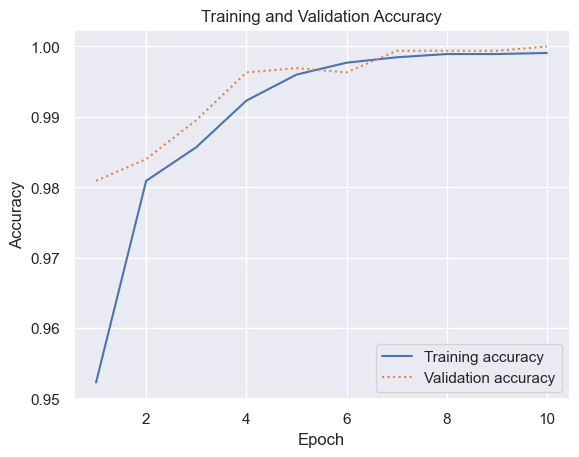

In [20]:
#plotting our training accuracy versus our validation accuracy

%matplotlib inline
sns.set()

acc = pca_hist.history['accuracy']
val = pca_hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()


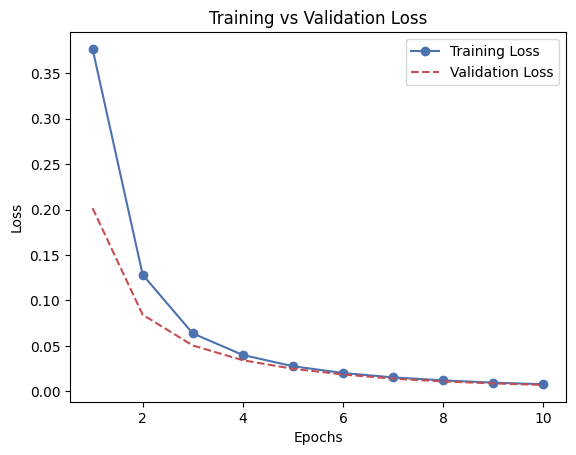

In [52]:
#Plotting the loss values of training vs validation

import matplotlib.pyplot as plt

# Extract loss values
train_loss = pca_hist.history['loss']
val_loss = pca_hist.history['val_loss']
epochs = range(1, len(train_loss) + 1)

# Plot training vs validation loss
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')  # 'bo-' means blue line with circle markers
plt.plot(epochs, val_loss, 'r--', label='Validation Loss')  # 'r--' means red dashed line
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Accuracy: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Precision: 1.0000


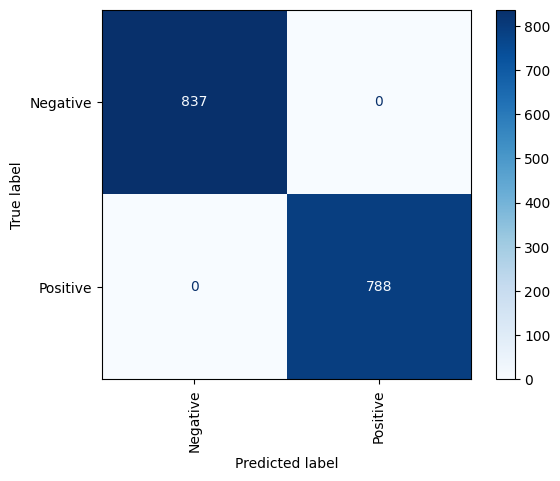

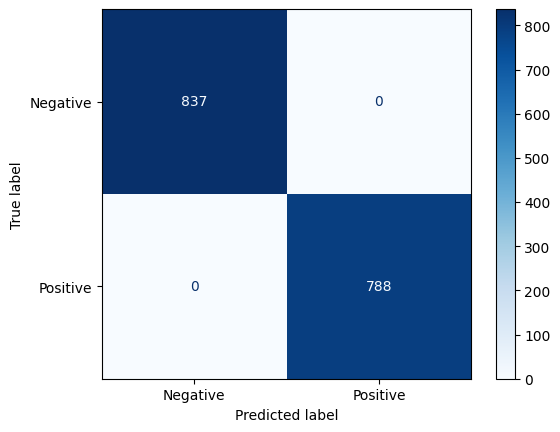

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, ConfusionMatrixDisplay

# Reset seaborn settings
sns.reset_orig()

# Get predictions and convert them to binary (assuming a classification task with threshold 0.5)
pca_y_predicted = pca_model.predict(pca_X_test) > 0.5

# Calculate performance metrics
accuracy = accuracy_score(y_test_label_encoded, pca_y_predicted)
recall = recall_score(y_test_label_encoded, pca_y_predicted)
f1 = f1_score(y_test_label_encoded, pca_y_predicted)
precision = precision_score(y_test_label_encoded, pca_y_predicted)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")

# Create confusion matrix display
labels = ['Negative', 'Positive']
ConfusionMatrixDisplay.from_predictions(y_test_label_encoded, pca_y_predicted, display_labels=labels, cmap='Blues')

# Show the plot
plt.show()


## Creating a KernalPCA model

In [37]:
from sklearn.decomposition import KernelPCA

kPCA = KernelPCA(n_components = 38, kernel = 'rbf', gamma = 1.0)
kPCA_X_train = kPCA.fit_transform(X_train_hot_encoded)
kPCA_X_test =  kPCA.transform(X_test_hot_encoded)

In [38]:
#create our neural network for our pca data, we follow the same standards as the above neural network. What changes is our input_dims because
#the pca features are less than before. 
kPCA_model = Sequential()

kPCA_model.add(Dense(128, activation='relu', input_dim=38))

kPCA_model.add(Dense(1,activation='sigmoid'))

kPCA_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
kPCA_model.summary()

C:\Users\mmice\tensorflow_env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 128)                 │           4,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,121 (20.00 KB)

 Trainable params: 5,121 (20.00 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
kPCA_hist = kPCA_model.fit(kPCA_X_train, y_train_label_encoded, validation_data=(kPCA_X_test, y_test_label_encoded), epochs=10, batch_size=100)
#fit our pca_model with our data, our x data is now the pca x data

Epoch 1/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7197 - loss: 0.6840 - val_accuracy: 0.6689 - val_loss: 0.6636
Epoch 2/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8903 - loss: 0.6396 - val_accuracy: 0.8634 - val_loss: 0.6058
Epoch 3/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9234 - loss: 0.5545 - val_accuracy: 0.9151 - val_loss: 0.5195
Epoch 4/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9340 - loss: 0.4483 - val_accuracy: 0.9151 - val_loss: 0.4305
Epoch 5/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9258 - loss: 0.3545 - val_accuracy: 0.9151 - val_loss: 0.3580
Epoch 6/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9277 - loss: 0.2858 - val_accuracy: 0.9151 - val_loss: 0.3048
Epoch 7/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9298 - loss: 0.2351 - val_accuracy: 0.9151 - val_loss: 0.2665
Epoch 8/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9247 - loss: 0.2095 - val_accuracy: 0.9151 - val_loss:

[]

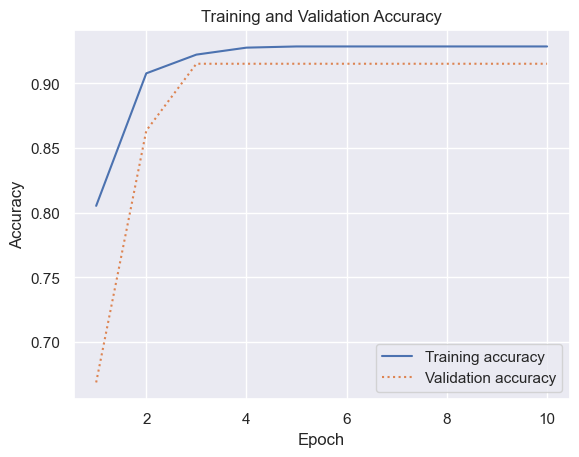

In [40]:
#plotting our training accuracy versus our validation accuracy

%matplotlib inline
sns.set()

acc = kPCA_hist.history['accuracy']
val = kPCA_hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Accuracy: 0.7243
Recall: 0.7360
F1 Score: 0.7214
Precision: 0.7073


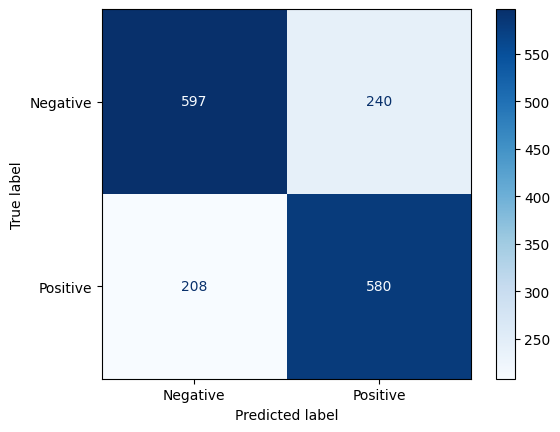

In [54]:
# Reset seaborn settings
sns.reset_orig()

# Get predictions and convert them to binary (assuming a classification task with threshold 0.5)
kPCA_y_predicted = kPCA_model.predict(pca_X_test) > 0.5

# Calculate performance metrics
accuracy = accuracy_score(y_test_label_encoded, kPCA_y_predicted)
recall = recall_score(y_test_label_encoded, kPCA_y_predicted)
f1 = f1_score(y_test_label_encoded, kPCA_y_predicted)
precision = precision_score(y_test_label_encoded, kPCA_y_predicted)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")

# Create confusion matrix display
labels = ['Negative', 'Positive']
ConfusionMatrixDisplay.from_predictions(y_test_label_encoded, kPCA_y_predicted, display_labels=labels, cmap='Blues')

# Show the plot
plt.show()


## Creating a non negative factorization model

In [42]:
from sklearn.decomposition import NMF

n_components = 20  # Reduce to 20 features
nmf = NMF(n_components=n_components, random_state=42)
X_train_nmf = nmf.fit_transform(X_train_hot_encoded)
X_test_nmf = nmf.transform(X_test_hot_encoded)

In [46]:
# Create a simple feedforward neural network
nnf_model = Sequential([
    Dense(64, activation='relu', input_shape=(n_components,)),  # Input layer
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
nnf_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
nnf_hist = nnf_model.fit(X_train_nmf, y_train_label_encoded, validation_data=(X_test_nmf, y_test_label_encoded), epochs=10, batch_size=32)

Epoch 1/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6262 - loss: 0.6618 - val_accuracy: 0.8634 - val_loss: 0.3796
Epoch 2/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9045 - loss: 0.3089 - val_accuracy: 0.9637 - val_loss: 0.1421
Epoch 3/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9646 - loss: 0.1342 - val_accuracy: 0.9649 - val_loss: 0.0971
Epoch 4/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9716 - loss: 0.0895 - val_accuracy: 0.9637 - val_loss: 0.0912
Epoch 5/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9731 - loss: 0.0786 - val_accuracy: 0.9723 - val_loss: 0.0684
Epoch 6/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9782 - loss: 0.0619 - val_accuracy: 0.9828 - val_loss: 0.0598
Epoch 7/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9780 - loss: 0.0606 - val_accuracy: 0.9772 - val_loss: 0.0547
Epoch 8/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9821 - loss: 0.0522 - val_accuracy: 0.

[]

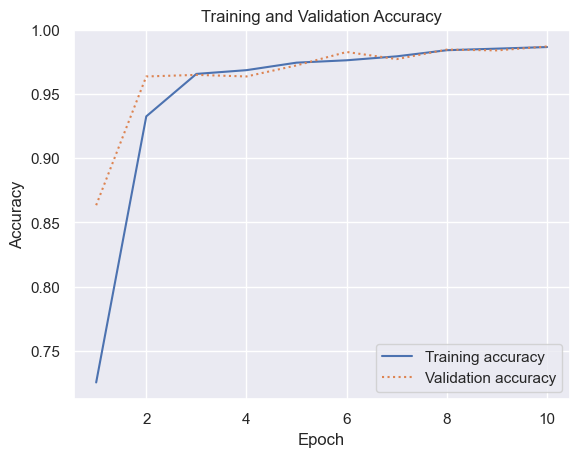

In [47]:
#plotting our training accuracy versus our validation accuracy

%matplotlib inline
sns.set()

acc = nnf_hist.history['accuracy']
val = nnf_hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Accuracy: 0.9871
Recall: 0.9772
F1 Score: 0.9865
Precision: 0.9961


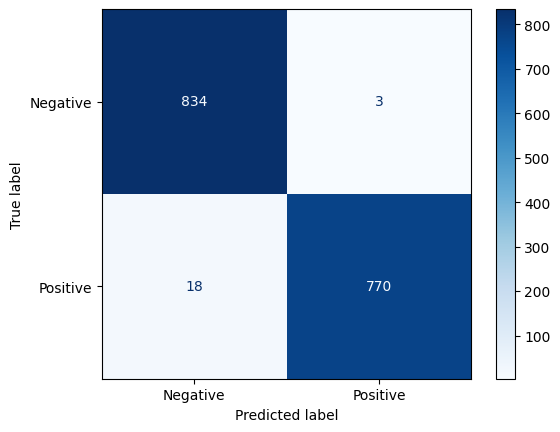

In [51]:
# Reset seaborn settings
sns.reset_orig()

# Get predictions and convert them to binary (assuming a classification task with threshold 0.5)
nnf_y_predicted = nnf_model.predict(X_test_nmf) > 0.5

# Calculate performance metrics
accuracy = accuracy_score(y_test_label_encoded, nnf_y_predicted)
recall = recall_score(y_test_label_encoded, nnf_y_predicted)
f1 = f1_score(y_test_label_encoded, nnf_y_predicted)
precision = precision_score(y_test_label_encoded, nnf_y_predicted)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")

# Create confusion matrix display
labels = ['Negative', 'Positive']
ConfusionMatrixDisplay.from_predictions(y_test_label_encoded, nnf_y_predicted, display_labels=labels, cmap='Blues')

# Show the plot
plt.show()

Unsupervised Learning Final Project

The main objective of this analysis is to create a binary classifier using a combination of a tensorflow neural network without dimensionality reduction and with 3 different kinds of dimensionality reduction and comparing results. 

Attribute Information: (classes: edible=e, poisonous=p)

     1. cap-shape:                bell=b,conical=c,convex=x,flat=f,
                                  knobbed=k,sunken=s
     2. cap-surface:              fibrous=f,grooves=g,scaly=y,smooth=s
     3. cap-color:                brown=n,buff=b,cinnamon=c,gray=g,green=r,
                                  pink=p,purple=u,red=e,white=w,yellow=y
     4. bruises?:                 bruises=t,no=f
     5. odor:                     almond=a,anise=l,creosote=c,fishy=y,foul=f,
                                  musty=m,none=n,pungent=p,spicy=s
     6. gill-attachment:          attached=a,descending=d,free=f,notched=n
     7. gill-spacing:             close=c,crowded=w,distant=d
     8. gill-size:                broad=b,narrow=n
     9. gill-color:               black=k,brown=n,buff=b,chocolate=h,gray=g,
                                  green=r,orange=o,pink=p,purple=u,red=e,
                                  white=w,yellow=y
    10. stalk-shape:              enlarging=e,tapering=t
    11. stalk-root:               bulbous=b,club=c,cup=u,equal=e,
                                  rhizomorphs=z,rooted=r,missing=?
    12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
    13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
    14. stalk-color-above-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,
                                  pink=p,red=e,white=w,yellow=y
    15. stalk-color-below-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,
                                  pink=p,red=e,white=w,yellow=y
    16. veil-type:                partial=p,universal=u
    17. veil-color:               brown=n,orange=o,white=w,yellow=y
    18. ring-number:              none=n,one=o,two=t
    19. ring-type:                cobwebby=c,evanescent=e,flaring=f,large=l,
                                  none=n,pendant=p,sheathing=s,zone=z
    20. spore-print-color:        black=k,brown=n,buff=b,chocolate=h,green=r,
                                  orange=o,purple=u,white=w,yellow=y
    21. population:               abundant=a,clustered=c,numerous=n,
                                  scattered=s,several=v,solitary=y
    22. habitat:                  grasses=g,leaves=l,meadows=m,paths=p,
                                  urban=u,waste=w,woods=d

The dataset that I am working with contains 8,123 rows and 23 columns of data. The columns of data represent characteristics of mushrooms, with column p being a determinant of whether or not a mushroom is poisonous or not poisonous. The goal of this project is to set column p as my target, and use the other 22 columns of data as features in order to try and determine if a mushroom is poisonous or non-poisonous. 

Upon examination of the data, it was determined that there was no numeric data available, and only categorical data existed within the dataset. There were no missing or duplicate values, so there was no need to fill in or drop any data. In order to create workable data from the data in the set, I set out to convert all non-numeric data into numeric data. I label-encoded my target value so that non-poisonous mushrooms were set to 0, and poisonous mushrooms were set to 1. I then one hot encoded all of my columns in order to convert the categorical data into numeric data. This increased my 22 columns of categorical data into 94 columns of numeric data.

I used three different dimensionality reduction techniques in combination with a tensorflow neural network in order to test to see which would make the best binary classifier. I used PCA with n_components = 0.95 on my encoded x_train and x_test data in order to reduce features, and ended up with 38 relevant features to run through my neural network. I then used a kernel PCA model with the hyperparameters of (n_components = 38, kernel = 'rbf', gamma = 1.0). Lastly, I used non negative matrix factorization with hyperparameters of (n_components=20, random_state=42). All of these were used with a tensorflow neural network with a hidden layer of 128 neurons and activation = 'relu, with an output layer of 1 with activation = 'sigmoid' for a binary classifier output. The compile components were set to (optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']).

After training and analyzing the results of the three models I created, I would have to recommend the PCA model, as it scored perfectly in its confusion matrix with perfect accuracy, recall, precision, and f1 scores. After plotting training and validation accuracy and training and validation loss, the graphs of each indicate that there was no overfitting of the data present, representing that this model can work incredibly well with the reduced dimensionality data from PCA. The kernel PCA model scored the worst, with all scores in the low to mid seventies with a combination of both false positives and false negatives. The non-negative factorization model also did exceptionally well, and with 20 components was able to score all scores in at 97% or above, with little false positives and false negatives. Again, the PCA model is the recommendation based on the fact that overfitting does not appear present and still being able to score with no misses.

The key findings of this work is that both the PCA model and the non-negative factorization model worked very well in helping to create a binary classifier through a tensorflow neural network. The PCA model was able to contain 95% of the variance in the data with only 38 components, and the non-negative factorization model was able to perform very highly with even less components at 20. Both of these models compete with a neural network which contains all the original data, meaning that I could save training time using the reduced data and still get the same or similar results. In addition, the kernel PCA may have been too complex for this dataset, as it performed much worse than all other models. 

If I were to revisit creating these models again, my takeaway is that the parameters for the kernel PCA would have to be tuned differently in order to see if a better neural network could be trained using that data. Additionally, the non-negative factorization method had 18 less features than the PCA model, but still scored very close to it. It is possible that only a few more features could be added to that model and it could perform just as well as the PCA model. If I could fine tune those hyperparameters even more, there is a chance I can get the same results of the PCA model with even less features, which would save even more training time.
